# Plot saved reconstruction snapshots from training

Subject: Obs2Wrfmpi for 1st era/obs storm, unit-wnet-wrferaext18-8f-mean0-trainer-3resblks-3ds-bse-dropout-ssim-simenc

### TOC
 [1. Load data](#ld)<br>
 





<a id='ld'></a>
# Load data

In [10]:
# load per-variable scale factors
minmaxi_era = np.load('/glade/scratch/dkorytin/minmaxi_wrferaext18.npy')
minmaxi_mpi = minmaxi_era


# Plot routines

In [102]:
def show_saved_reconstruction(ii, input_chunk, xoff=20, yoff=58, vmin=None, vmax=None):
    # denorm
    input_img_denorm = input_chunk * (minmaxi_era[:,1]-minmaxi_era[:,0])[np.newaxis,:,np.newaxis,np.newaxis] + minmaxi_era[:,0][np.newaxis,:,np.newaxis,np.newaxis]
    raw_era = np.array(input_img_denorm)[0]
    raw_era[np.isnan(raw_era)] = 0.   # extended surface domain has nan's at bottom
    #raw_era[8:] = (raw_era * mask)[8:]

    # ^4 prec
    raw_era[8] = raw_era[8] ** 4.
     
    if vmin == None or vmax == None:
        vmin = [raw_era[ii].min() for ii in range(18)]
        vmax = [raw_era[ii].max() for ii in range(18)]

    svars = [0,1,2,3,4,5,6,7,17]
    plot_9v_192x256_abs(raw_era, None, vmin, vmax, svars=svars, xoff=xoff, yoff=yoff)
    svars = [8,9,10,11,12,13,14,15,16]
    plot_9v_192x256_abs(raw_era, None, vmin, vmax, svars=svars, xoff=xoff, yoff=yoff)
    
    return vmin, vmax


In [136]:
# 0-mean
era_mean = np.array([0.535485  , 0.4519444 , 0.28083166, 0.6958344 , 0.74353546,
        0.7667949 , 0.45282447, 0.53518105, 0.02868525, 0.3436686 ,
        0.32084906, 0.27729246, 0.26444143, 0.06457039, 0.1160536 ,
        0.11771968, 0.27282715, 0.4996573 ], dtype='float32')
mpi_mean = np.array([0.5344214 , 0.45174   , 0.2868751 , 0.67098534, 0.7369371 ,
        0.75135934, 0.44308293, 0.5318341 , 0.03761845, 0.18091248,
        0.18680423, 0.1376027 , 0.13063669, 0.06532818, 0.14322543,
        0.11771968, 0.27282715, 0.4996573 ], dtype='float32')



Original Input


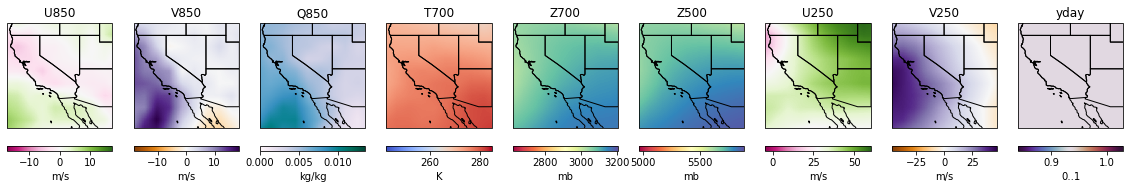

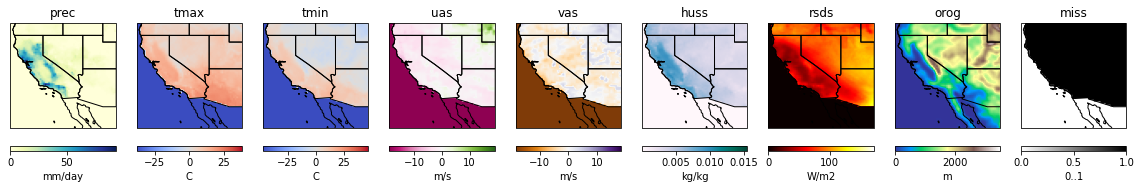

In [103]:
# show raw input as header and use its min/max for subsequent autoscale

# Weather anomalies from paper
storms = np.load('/glade/scratch/dkorytin/storms_wrferaext18.npy')[0:1]
#storms[np.isnan(storms)] = 0.   # extended surface domain has nan's at bottom
minmaxi_era = np.load('/glade/scratch/dkorytin/minmaxi_wrferaext18.npy')
minmaxi_mpi = minmaxi_era

# denormalize
input_img_denorm = storms * (minmaxi_era[:,1]-minmaxi_era[:,0])[np.newaxis,:,np.newaxis,np.newaxis] + minmaxi_era[:,0][np.newaxis,:,np.newaxis,np.newaxis]
raw_era = np.array(input_img_denorm)[0]
raw_era[np.isnan(raw_era)] = 0.   # extended surface domain has nan's at bottom

# ^4 prec
raw_era[8] = raw_era[8] ** 4.


vmin = [raw_era[0][ii].min() for ii in range(18)]
vmax = [raw_era[0][ii].max() for ii in range(18)]

print('Original Input')
storms = np.load('/glade/scratch/dkorytin/storms_wrferaext18.npy')[0:1]

vmin, vmax = show_saved_reconstruction(0, storms[0])


In [104]:
print(vmax)

[17.34402002279171, 18.463630418960065, 0.013535473766310802, 284.7338595689653, 3206.861337834969, 5884.821454404184, 60.12464441407246, 46.85462404842019, 93.61626093226774, 27.68681559762217, 22.696133072191515, 14.616988484894932, 9.339969789790757, 0.015555081130633433, 171.44283486673157, 3488.182861328125, 1.0, 0.934834897518158]


['50000', '0.007091193459928036', '0.004135196562856436', '0.10063236951828003', '0.06146270036697388', '4.2904486656188965', '0.05341215431690216']


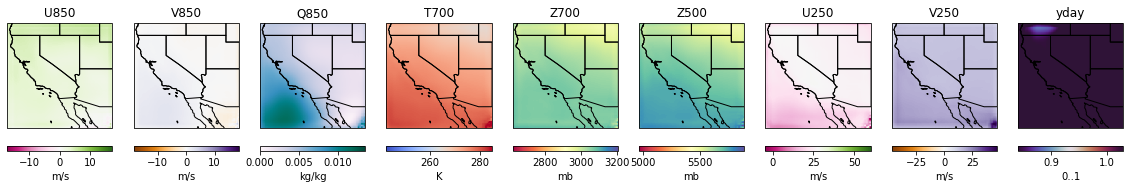

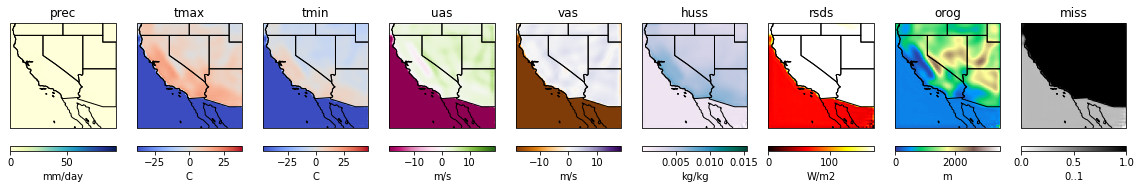

['100000', '0.003605750622227788', '0.0031496635638177395', '0.05803191661834717', '0.04802161455154419', '2.833552598953247', '0.04113488271832466']


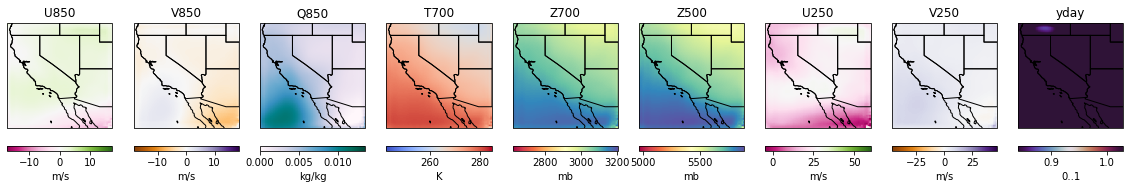

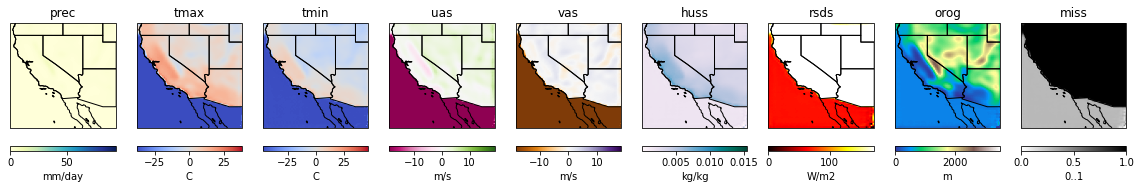

['150000', '0.004143408499658108', '0.0037151400465518236', '0.06249290704727173', '0.0711057186126709', '3.396263599395752', '0.030964935198426247']


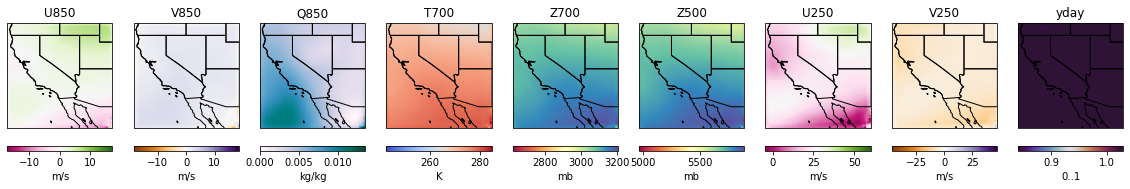

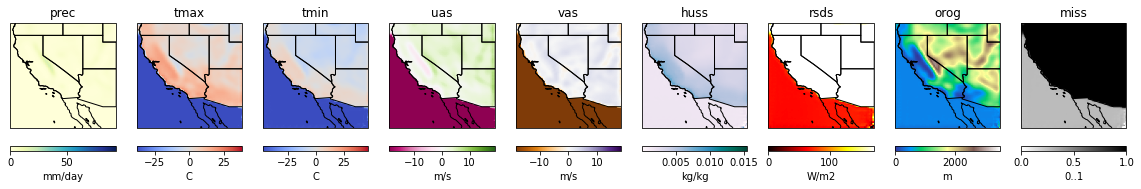

['200000', '0.003397350199520588', '0.00656635919585824', '0.0896264910697937', '0.09136855602264404', '4.650506496429443', '0.029352931305766106']


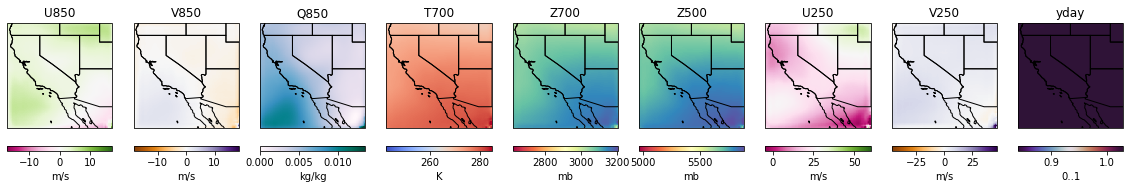

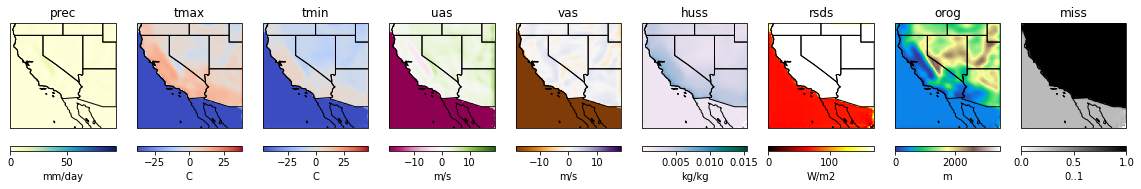

['250000', '0.004099397920072079', '0.003348645754158497', '0.05202186107635498', '0.057107508182525635', '3.065037250518799', '0.02088162675499916']


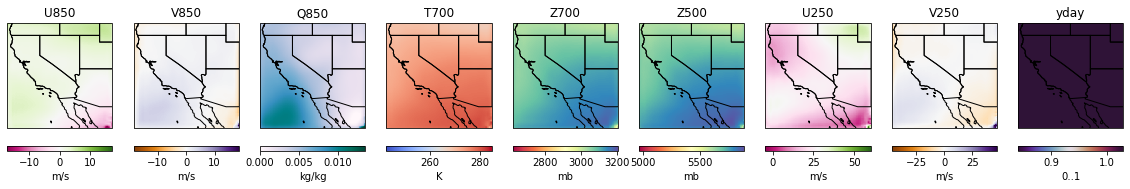

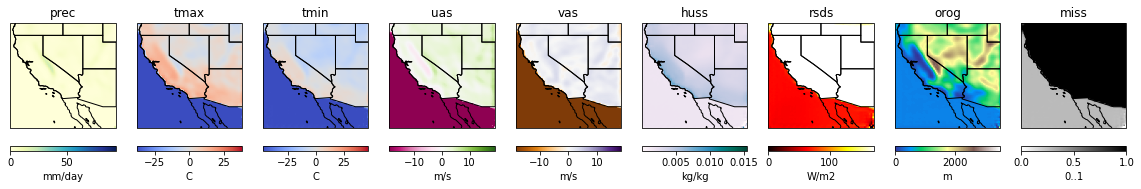

['300000', '0.0048894560895860195', '0.008087285794317722', '0.0668674111366272', '0.08858382701873779', '3.8801398277282715', '0.018030866980552673']


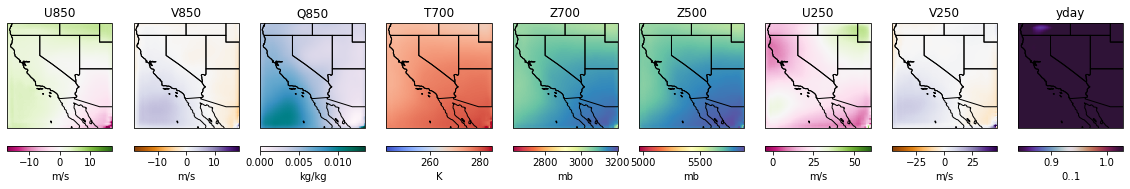

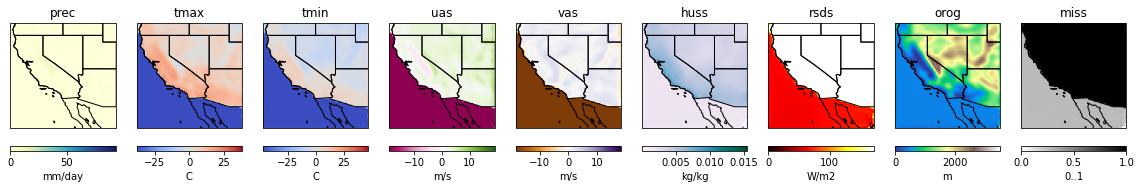

['350000', '0.005419248715043068', '0.006968765519559383', '0.06432700157165527', '0.038892507553100586', '2.766258955001831', '0.014934469014406204']


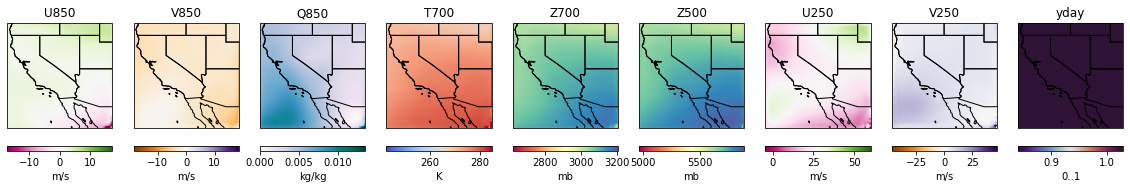

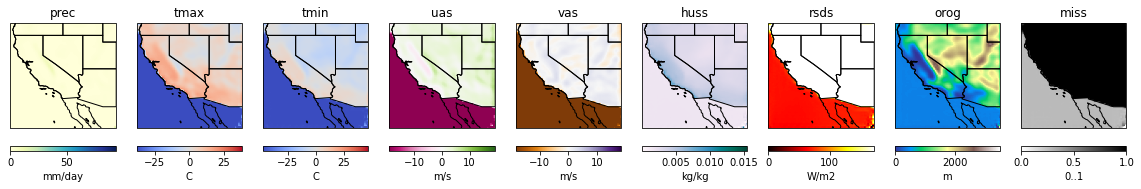

['400000', '0.0039879619143903255', '0.006676461081951857', '0.06529635190963745', '0.040314435958862305', '2.9087777137756348', '0.012783952057361603']


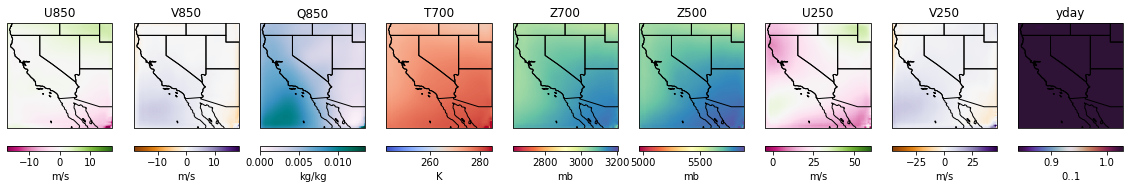

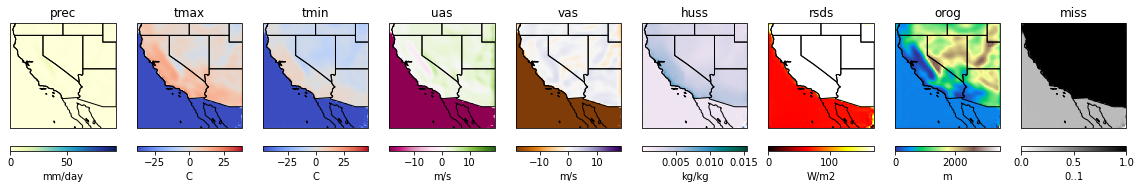

['450000', '0.002708216430619359', '0.006231413222849369', '0.04677611589431763', '0.03418898582458496', '2.471766948699951', '0.013717558234930038']


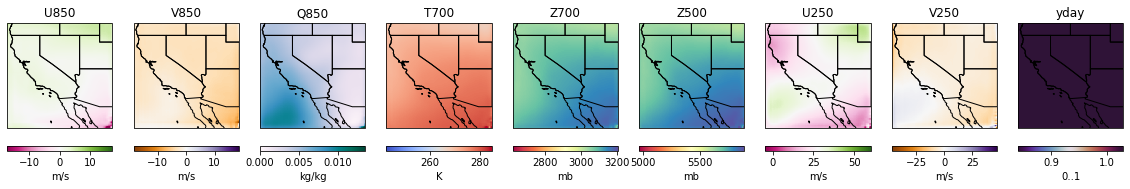

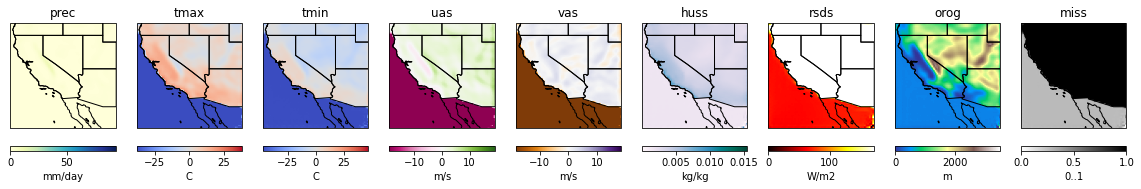

['500000', '0.003872078377753496', '0.004800168797373772', '0.06372421979904175', '0.026263892650604248', '2.6472909450531006', '0.0110147874802351']


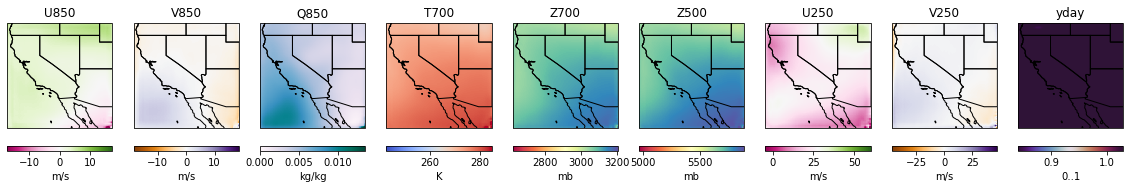

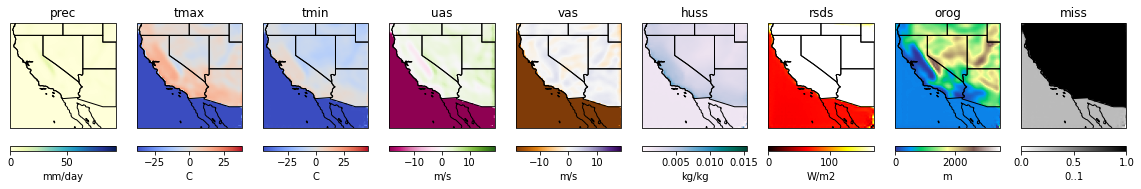

['550000', '0.0028038008604198694', '0.006428614258766174', '0.0621379017829895', '0.06800204515457153', '3.4426488876342773', '0.010079439729452133']


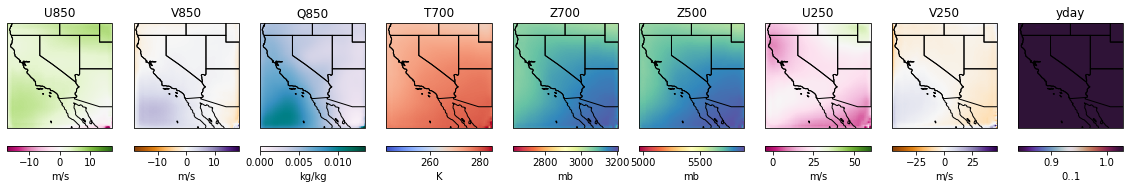

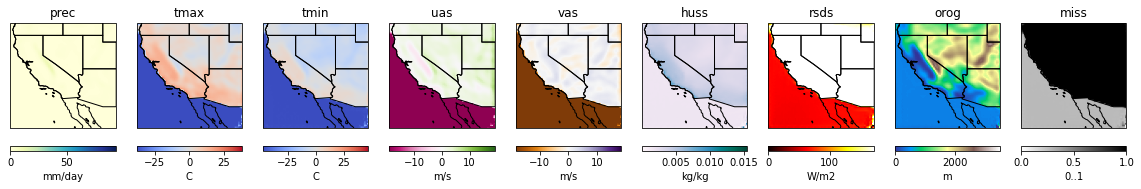

['600000', '0.002650182694196701', '0.008813904598355293', '0.06596213579177856', '0.06361758708953857', '3.342697858810425', '0.009403260424733162']


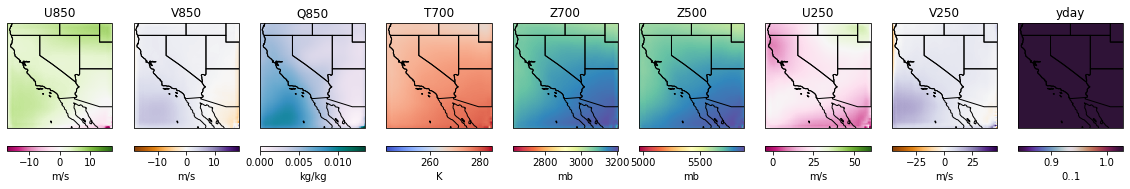

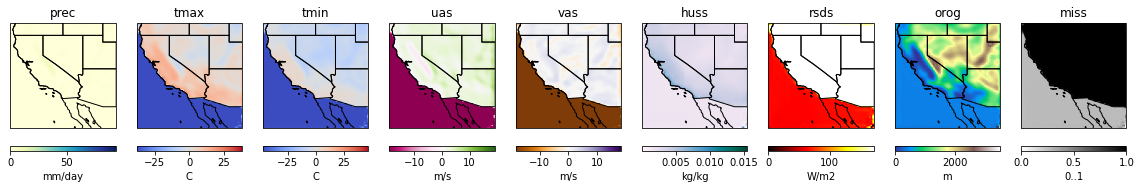

['650000', '0.003622315125539899', '0.006928250193595886', '0.048196375370025635', '0.04362785816192627', '2.648682117462158', '0.010194353759288788']


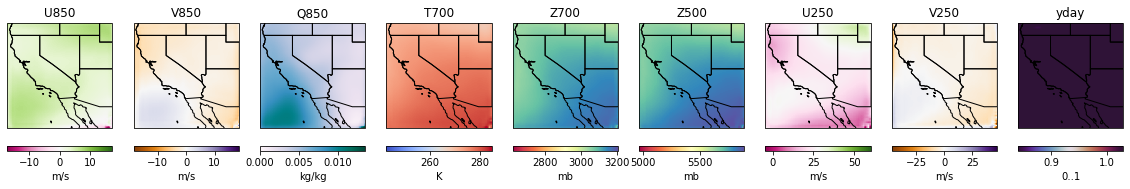

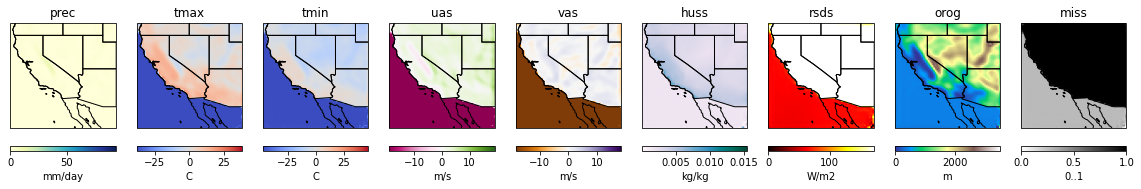

['700000', '0.0026862670201808214', '0.003967353142797947', '0.04522216320037842', '0.058393895626068115', '2.9056179523468018', '0.007413012906908989']


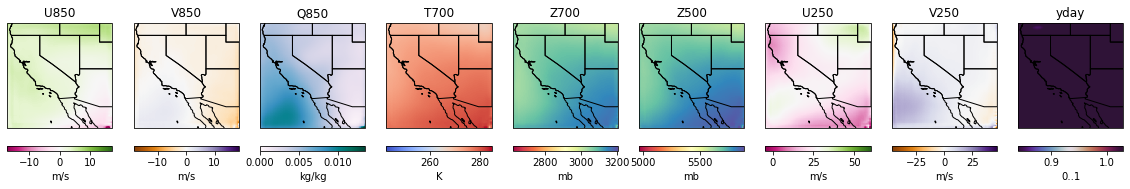

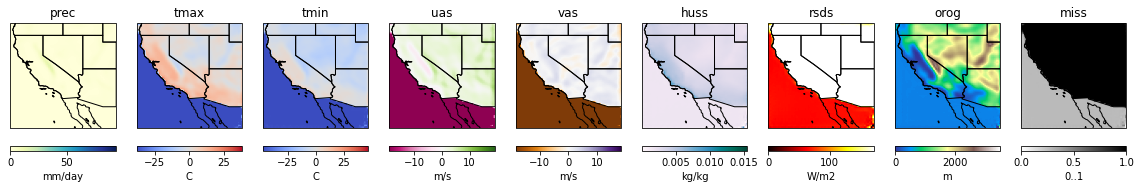

In [150]:
# Open the CSV file for reading
with open('/glade/scratch/dkorytin/unit-wnet-wrferaext18-8f-mean0-trainer-3resblks-3ds-bse-dropout-ssim-simenc/output/mse.csv', 'r') as file:
    # Create a CSV reader object
    csv_reader = csv.reader(file)

    # Loop over each line in the CSV file
    for row in csv_reader:
        # `row` is a list representing the values in the current row   
        ii = int(row[0])
        if int(ii) % 50000 == 0:
            print(row)  # Example: print the row data

            #padded_str = str(ii).zfill(6)
            padded_str = str(ii)

            ## Load numpy file
            arr = np.load('/glade/scratch/dkorytin/unit-wnet-wrferaext18-8f-mean0-trainer-3resblks-3ds-bse-dropout-ssim-simenc/output/ii_'+padded_str+'_mpi.npy')

            # 0 mean
            arr += mpi_mean.reshape((1, 18, 1, 1))

            ## 0.5 mean
            #arr += (era_mean.reshape((1, 18, 1, 1)) + 0.5)

            #show_saved_reconstruction(0, arr)
            show_saved_reconstruction(0, arr, vmin=vmin, vmax=vmax)